In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置单元格所有行全部输出模式
from IPython.core.interactiveshell import InteractiveShell

# 设置InteractiveShell对象的ast_node_interactivity的值为all，即表示每一个单元格所有有输出的代码行全部需要输出
InteractiveShell.ast_node_interactivity = 'all'

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.style.use('ggplot')

In [2]:
# 通过pandas的read_csv加载数据
df = pd.read_csv('./data/loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [6]:
# 初步的数据预处理：删除主键索引、唯一索引字段
df = df.drop(['Loan_ID'],axis=1) # 约定：哪怕是只删除一列，最好也是放在一个数组中来指定这个列的列索引名

In [7]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [5]:
# api1:isnull().any()-判断特征列是否存在缺失值
df.isnull().any() # 以ndarray数组返回每一个特征列是否存在缺失值，存在为true，不存在为false

Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [6]:
# api2:isull().sum()-统计每一个特征列出现的缺失值的个数
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# missingno:专用于数据集各特征列缺失值分布直方图绘制的工具库
!pip install missingno

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 293 kB 101.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ma-user/anaconda3/envs/PyTorch-1.8/bin/python3.7 -m pip install --upgrade pip' command.


In [8]:
import missingno as ms

<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Simhei


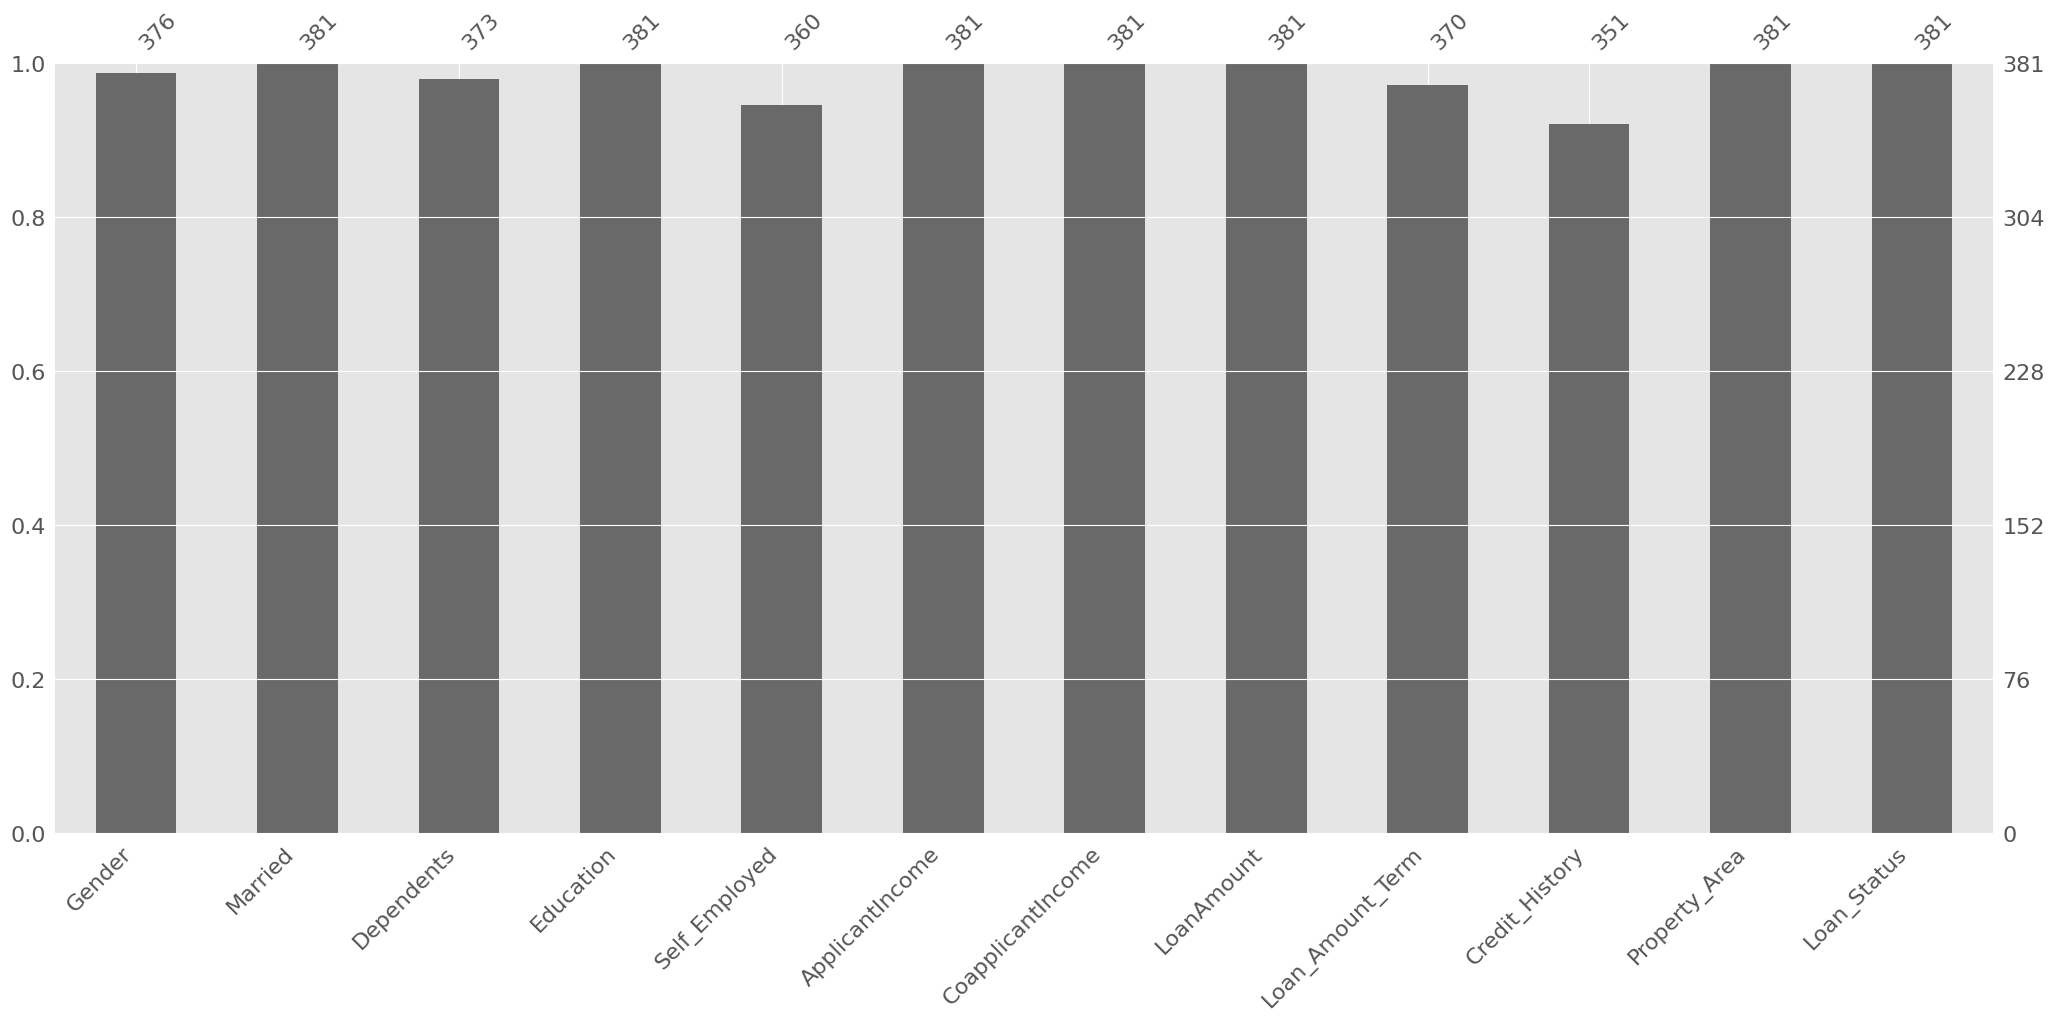

In [9]:
# api:ms.bar(df)-根据传入的数据集，绘制数据集各个特征列的缺失值分布直方图
ms.bar(df) # 横坐标：各个特征列索引名称 - 纵坐标：缺失值占比，浮点数取值 

In [10]:
# 在真实的生产应用情况下，其实建议最好设计一个通用的，可复用的缺失值（异常值等）检测的工具函数，建议
# 将其封装在工程目录下的utils目录，作为一个复用工具函数，就可以实现缺失值更方便的检测
def check_missing_value(df):
    '''
    检测数据集各个特征列缺失值分布的复用检测函数
    '''
    
    print('对于当前数据集，总计：{}行，{}列'.format(df.shape[0],df.shape[1]))
    
    # 构造一个输出结果的dataframe，他会根据每一个特征，列出每一个特征需要被检测的相关信息
    missing_result = pd.DataFrame(df.dtypes,columns=['data types'])
    
    # 检测各个特征列是否存在缺失值
    missing_result['isMissing'] = df.isnull().any().values
    
    # 检测各个特征列的缺失值个数
    missing_result['missing counts'] = df.isnull().sum().values
    
    # 检测各个特征列的缺失值占比情况
    missing_result['missing rate'] = df.isnull().sum().values / len(df) * 100
    
    # 构造各个特征列相关的数字特征信息
    describe_data = df.describe(include='all').transpose() 
    # 参数include：所有特征都参与数字特征计算过程
    
    # 最小值
    missing_result['min'] = describe_data['min']
    missing_result['max'] = describe_data['max']
    missing_result['25%'] = describe_data['25%']
    missing_result['50%'] = describe_data['50%']
    missing_result['75%'] = describe_data['75%']
    missing_result['mean'] = describe_data['mean']
    missing_result['std'] = describe_data['std']
    
    # 各个特征列缺失值分布直方图绘制出来
    print('开始绘制缺失值分布直方图...')
    ms.bar(df)
    
    # 检测各个特征列的缺失值个数
    return missing_result

对于当前数据集，总计：381行，12列
开始绘制缺失值分布直方图...


,data types,isMissing,missing counts,missing rate,min,max,25%,50%,75%,mean,std
Gender,object,True,5,1.312336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,object,False,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,object,True,8,2.099738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,object,False,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,object,True,21,5.511811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,int64,False,0,0.000000,150,9703,2600,3333,4288,3579.85,1419.81
CoapplicantIncome,float64,False,0,0.000000,0,33837,0,983,2016,1277.28,2340.82
LoanAmount,float64,False,0,0.000000,9,150,90,110,127,104.987,28.3585
Loan_Amount_Term,float64,True,11,2.887139,12,480,360,360,360,340.865,68.5493
Credit_History,float64,True,30,7.874016,0,1,1,1,1,0.837607,0.369338


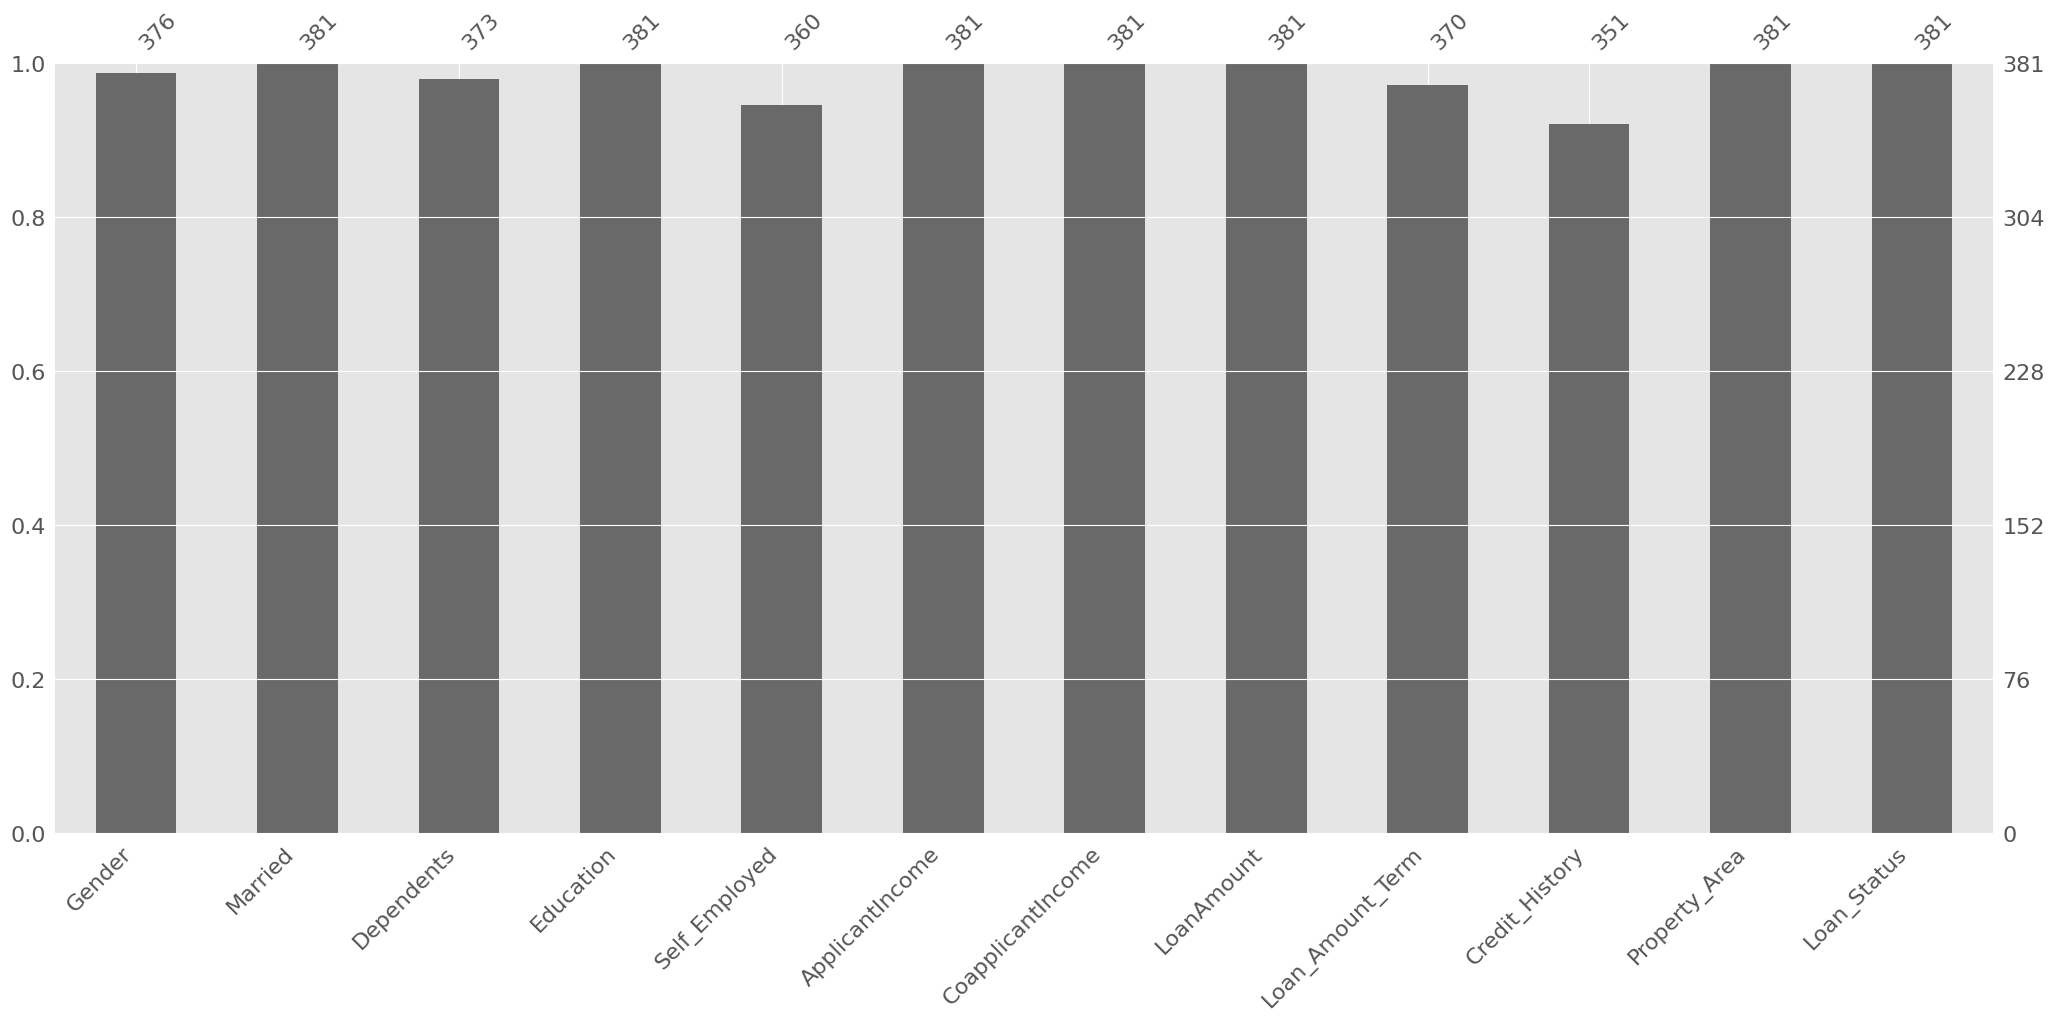

In [11]:
check_missing_value(df)

In [12]:
df.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,376,381,373,381,360,381.000000,381.000000,381.000000,370.000000,351.000000,381,381
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,291,228,234,278,325,NaN,NaN,NaN,NaN,NaN,149,271
mean,NaN,NaN,NaN,NaN,NaN,3579.845144,1277.275381,104.986877,340.864865,0.837607,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1419.813818,2340.818114,28.358464,68.549257,0.369338,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2600.000000,0.000000,90.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3333.000000,983.000000,110.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,4288.000000,2016.000000,127.000000,360.000000,1.000000,NaN,NaN


In [13]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [14]:
# 输出df的info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [15]:
# 临时测试：单独查看Dependents列
df['Dependents'].value_counts()

0     234
2      59
1      52
3+     28
Name: Dependents, dtype: int64

In [16]:
# 更换绘图工具为seaborn，画出来的图更好看一点
!pip install seaborn

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/PyTorch-1.8/bin/python3.7 -m pip install --upgrade pip' command.


In [17]:
import seaborn as sns

In [24]:
# 绘制各个特征列的取值分布直方图
def getHist(df,col_count):
    '''
    绘制数据集各个特征列取值分布直方图
    注意：默认输入的df数据集的最后一列为特征，一般情况下，如果只是分析特征的取值分布，
    则无需绘制标签结果的取值分布
    但是：这里是做分类问题，那么标签结果的取值分布对我们来说也很重要，因为标签结果的取值分布可以很好的反应
    样本的类别分布是否产生了不均衡问题
    '''
    
    # 获取数据集特征列索引名称，转换为list存储
    df_columns = list(df.columns)
    print('当前数据集中所有的列为：{}'.format(df_columns))
    
    # 获取数据集的特征列的数量
    num_cols = len(df_columns)
    print('当前数据集中，列的数量为：{}'.format(num_cols))
    
    # 指定多图布局中一行布局下的列数
    num_per_rows = col_count # 无论多少个特征，多少行，反正一行就是5列
    
    # 根据数据集特征的列数以及指定的多图布局中一行的列数，计算多图布局需要多少行
    num_rows = (num_cols + num_per_rows - 1) // num_per_rows
    print('当前构造的多图布局的形状为：{}'.format((num_rows,num_per_rows)))
    
    # 创建多图均匀布局
    fig,axes = plt.subplots(num_rows,num_per_rows,figsize=(15,6 * num_rows)) # 指定多图布局的行列数
    
    # 借助enumerate枚举函数，遍历多图布局的同时获取每一个子区域绘图对象的索引，用该索引在df_columns中取值
    # 完成依次的特征的取值分布直方图的绘制
    for i,col in enumerate(df_columns):
        
        print('***当前获取到了第{}个列，其名称为：{}'.format(i + 1,col))
        
        # 计算当前需要绘制的子区域在多图均匀布局中的索引
        row_id = i // num_per_rows
        
        # 计算当前需要绘制的子区域在多图均匀布局中的列索引
        col_id = i % num_per_rows
        print('***当前列：{}要绘制的多图布局子区域的位置为：{}'.format(col,(row_id,col_id)))
        
        # 指定绘图子区域
        ax = axes[row_id, col_id]
        
        # histplot方法绘制直方图
        sns.histplot(df[col], ax=ax)
        
        # 设置标题
        ax.set_title(col)

当前数据集中所有的列为：['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
当前数据集中，列的数量为：12
当前构造的多图布局的形状为：(3, 5)
***当前获取到了第1个列，其名称为：Gender
***当前列：Gender要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：Married
***当前列：Married要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：Dependents
***当前列：Dependents要绘制的多图布局子区域的位置为：(0, 2)
***当前获取到了第4个列，其名称为：Education
***当前列：Education要绘制的多图布局子区域的位置为：(0, 3)
***当前获取到了第5个列，其名称为：Self_Employed
***当前列：Self_Employed要绘制的多图布局子区域的位置为：(0, 4)
***当前获取到了第6个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(1, 0)
***当前获取到了第7个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(1, 1)
***当前获取到了第8个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(1, 2)
***当前获取到了第9个列，其名称为：Loan_Amount_Term
***当前列：Loan_Amount_Term要绘制的多图布局子区域的位置为：(1, 3)
***当前获取到了第10个列，其名称为：Credit_History
***当前列：Credit_History要绘制的多图布局子区域的位置为：(1, 4)
***当前获取到了第11个列，其名称为：Proper

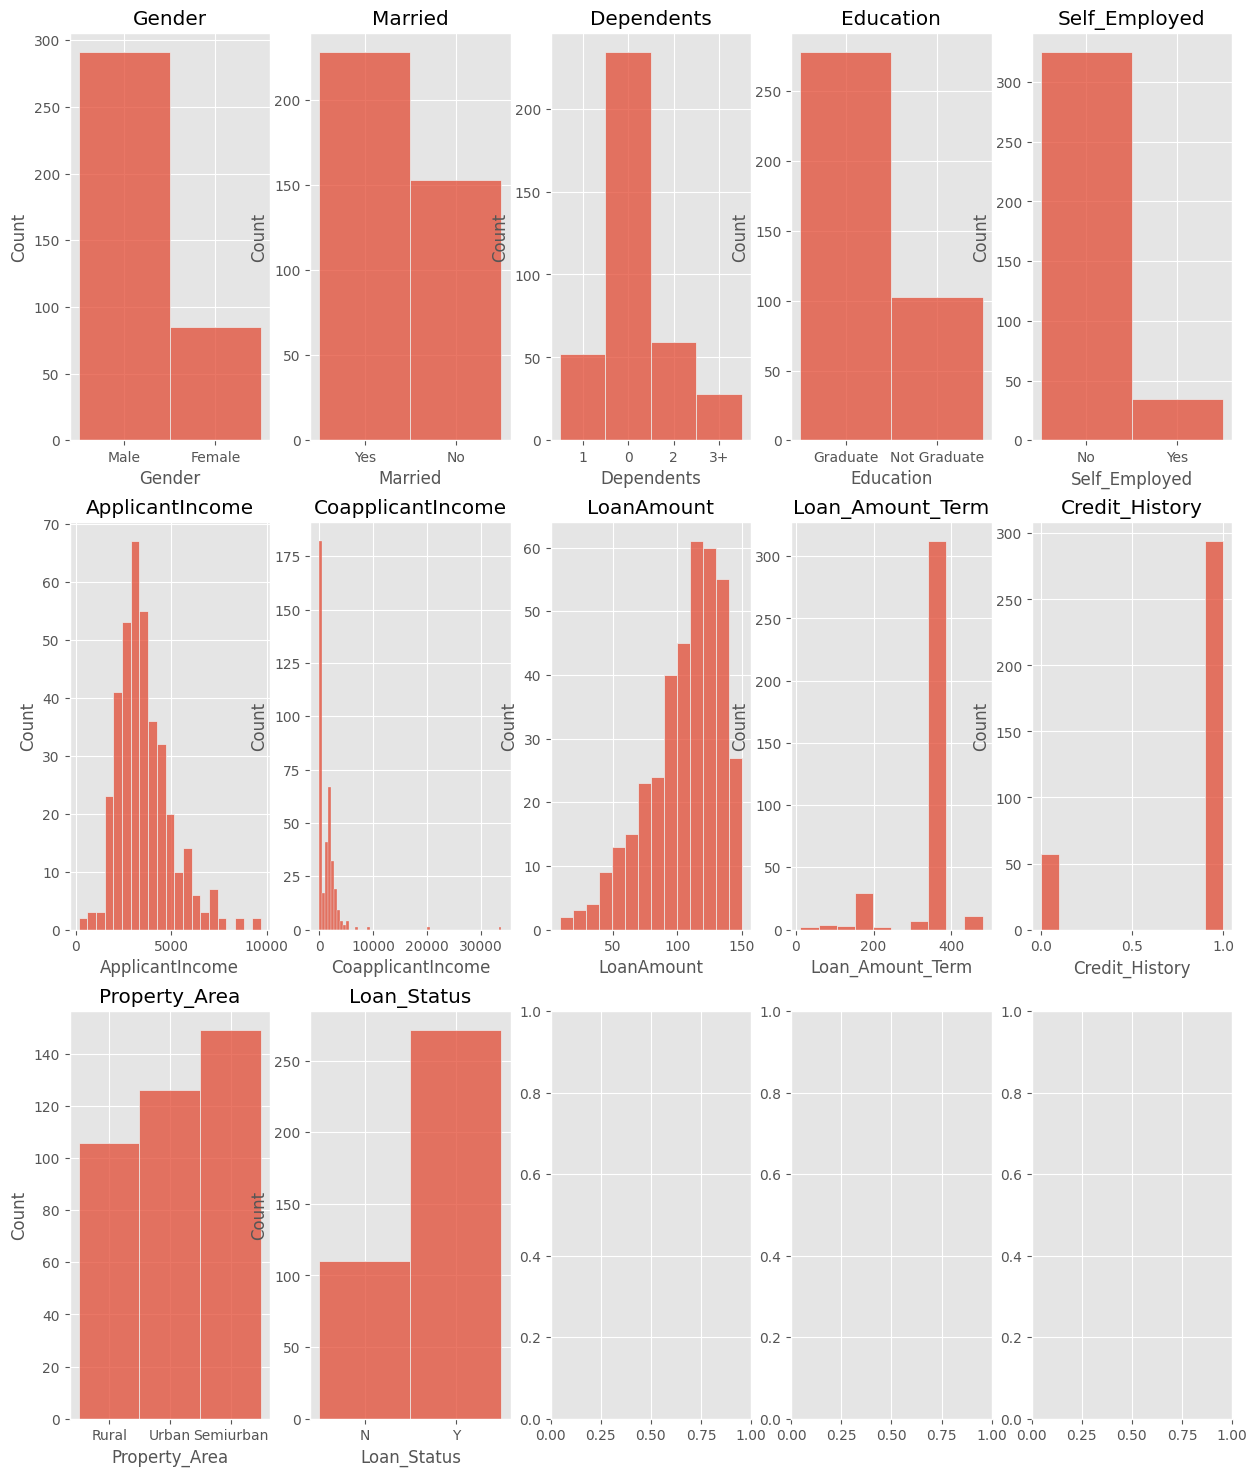

In [25]:
getHist(df,5)

In [26]:
# 临时测试：针对Loan_Amount_Term列，结合绘制的特征取值分布直方图进一步最终确认其是否为数值型特征
df['Loan_Amount_Term'].value_counts()
# 结合特征取值分布直方图，如何最终判断某特征为数值型？只需要value_count()确认其取值的分布情况中
# 是否存在一个现象：纵观特征的所有取值，不存在某一值取到的次数较高，次数的阈值其实随意指定，一般而言，阈值为
# 不超过10左右吧，且必须取到了超过80%以上样本数量的取值种类

360.0    312
180.0     29
480.0     11
300.0      7
84.0       3
120.0      3
240.0      2
36.0       1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
df['Credit_History'].value_counts()

1.0    294
0.0     57
Name: Credit_History, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [29]:
# 结论：综上完整的分析过程，得出：
# 仅有ApplicantIncome,CoapplicantIncome,LoanAmount为数值型连续特征，其余都为类别型离散特征

In [35]:
# 分开不同的特征，进行单独的缺失值处理了
num_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
class_features = list(df.columns[:-1].drop(num_features))

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [36]:
# 缺失值填充方法1：使用sklearn自带的预处理模块中的SimpleImputer方法直接填充
from sklearn.impute import SimpleImputer

对于当前数据集，总计：381行，3列
开始绘制缺失值分布直方图...


,data types,isMissing,missing counts,missing rate,min,max,25%,50%,75%,mean,std
ApplicantIncome,int64,False,0,0.0,150.0,9703.0,2600.0,3333.0,4288.0,3579.845144,1419.813818
CoapplicantIncome,float64,False,0,0.0,0.0,33837.0,0.0,983.0,2016.0,1277.275381,2340.818114
LoanAmount,float64,False,0,0.0,9.0,150.0,90.0,110.0,127.0,104.986877,28.358464


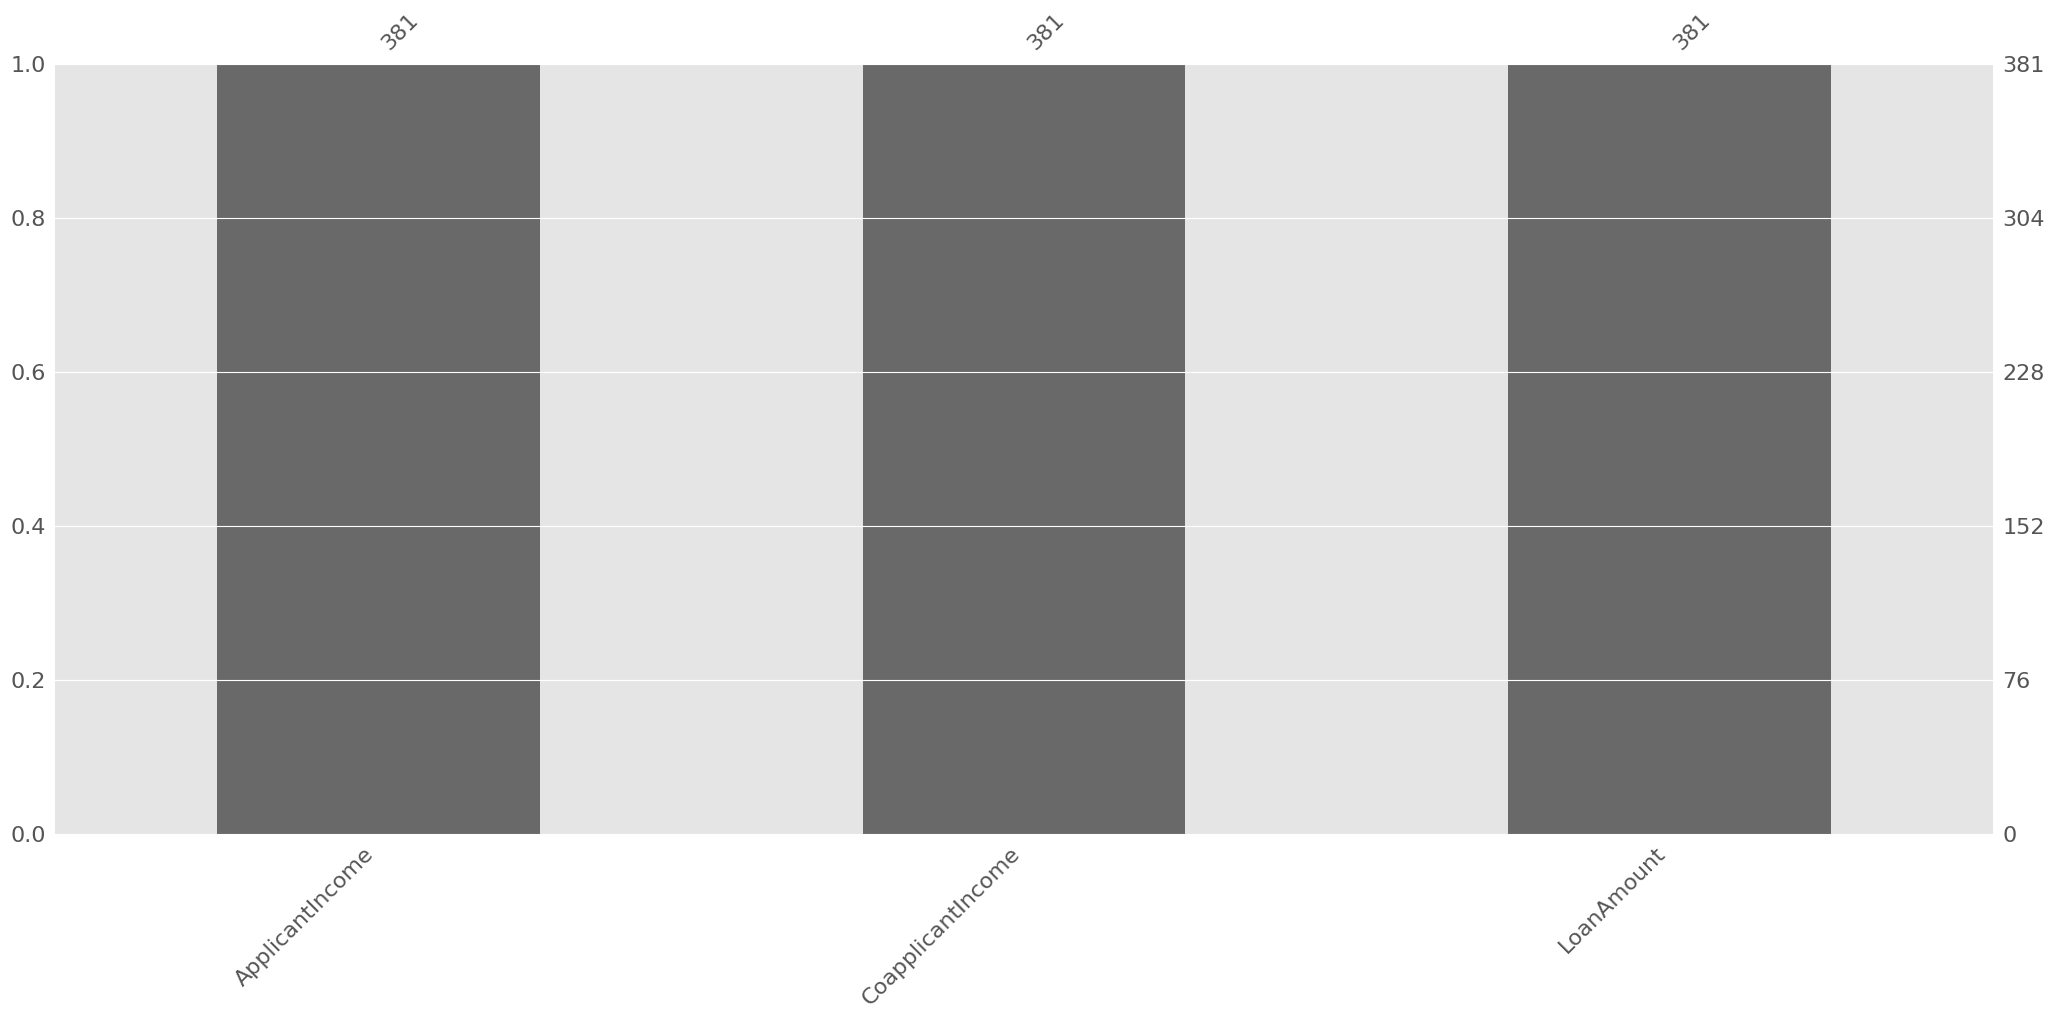

In [37]:
# 填充第一步：检测三个数值型特征是否具有缺失值
check_missing_value(df[num_features])

In [61]:
# 经过检测，当前测试数据集中，三个数值型特征列并不存在缺失值，那这么的，咱手动给它添加一些缺失值，为了
# 下一步能够更好的演示缺失值填充示例

# 先准备一个随机种子
rng = np.random.RandomState(0)
missing_rate = 0.5 # 表示出现缺失值的比例是原始数据集中所有特征值的一半！

# 从当前测试数据集中截取出三个数值型特征列作为一个临时测试数据集
tmp_df = df[num_features]
tmp_df_columns = tmp_df.columns

# 获取临时测试数据集形状
n_samples,n_features = tmp_df.shape

# 计算所需干为缺失值的特征取值的数量
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))

# 只需指定：在哪些行要具有缺失值 在哪些列要具有缺失值 - 随机选取任意行和任意列对应的数据，将其搞成缺失值！
missing_samples = rng.randint(0,n_samples,n_missing_samples) # 随机在某一行准备生成缺失值
missing_features = rng.randint(0,n_features,n_missing_samples) # 随机在某一列准备生成缺失值

# 取到missing_samples行、missing_features列的位置的值都将被干为缺失值！
tmp_df = np.array(tmp_df)
tmp_df[missing_samples,missing_features] = np.nan
tmp_df = pd.DataFrame(data=tmp_df,columns=tmp_df_columns)

对于当前数据集，总计：381行，3列
开始绘制缺失值分布直方图...


,data types,isMissing,missing counts,missing rate,min,max,25%,50%,75%,mean,std
ApplicantIncome,float64,True,157,41.207349,210.0,9703.0,2638.75,3329.5,4110.5,3546.392857,1360.153815
CoapplicantIncome,float64,True,148,38.845144,0.0,33837.0,0.00,830.0,2000.0,1345.583348,2805.560308
LoanAmount,float64,True,152,39.895013,17.0,150.0,94.00,111.0,128.0,105.751092,28.726540


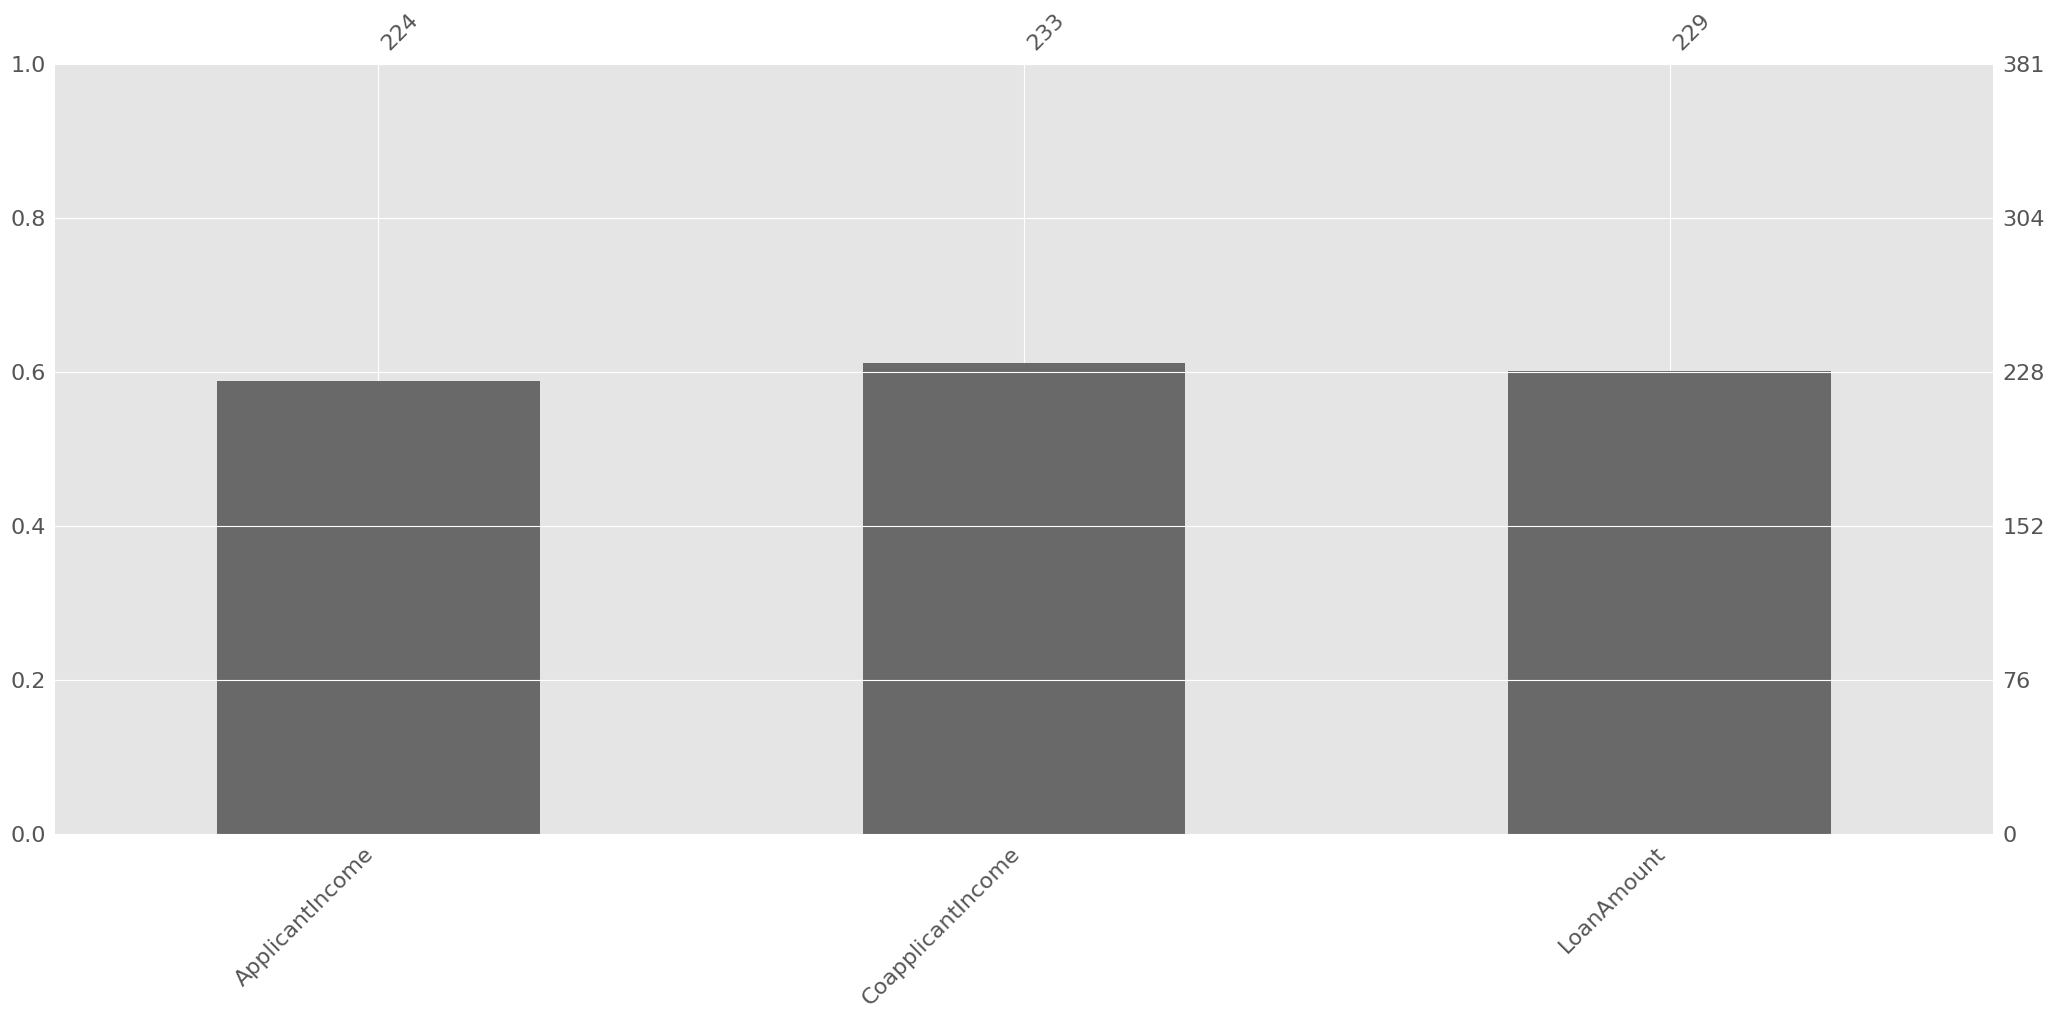

In [62]:
# 临时测试：检测临时测试数据集模拟缺失值生成的结果情况
check_missing_value(tmp_df)

In [47]:
# 填充第二步：针对三个具有缺失值的数值型特征列，使用SimpleImputer填充缺失值，填充的数字特征为各自特征的均值
# sklearn提供的数据预处理API仍然保持了与模型API相同或相类似的方法封装，即这里其实就是在构建一个sklearn模型
# 模型构建好之后，只需要立刻训练，即可完成缺失值的填充，随后再次调用fransform方法即可生成填充缺失值完毕后的数据集
tmp_df = pd.DataFrame(
    data=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(tmp_df),
    columns=tmp_df_columns
)

In [48]:
tmp_df

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,4583.000000,1508.000000,105.751092
1,3000.000000,0.000000,66.000000
2,2583.000000,1345.583348,120.000000
3,3546.392857,0.000000,105.751092
4,2333.000000,1345.583348,105.751092
...,...,...,...
376,5703.000000,1345.583348,105.751092
377,3232.000000,1345.583348,105.751092
378,2900.000000,0.000000,105.751092
379,4106.000000,0.000000,105.751092


对于当前数据集，总计：381行，3列
开始绘制缺失值分布直方图...


,data types,isMissing,missing counts,missing rate,min,max,25%,50%,75%,mean,std
ApplicantIncome,float64,False,0,0.0,210.0,9703.0,3159.000000,3546.392857,3546.392857,3546.392857,1041.954266
CoapplicantIncome,float64,False,0,0.0,0.0,33837.0,0.000000,1345.583348,1508.000000,1345.583348,2192.157748
LoanAmount,float64,False,0,0.0,17.0,150.0,105.751092,105.751092,115.000000,105.751092,22.251482


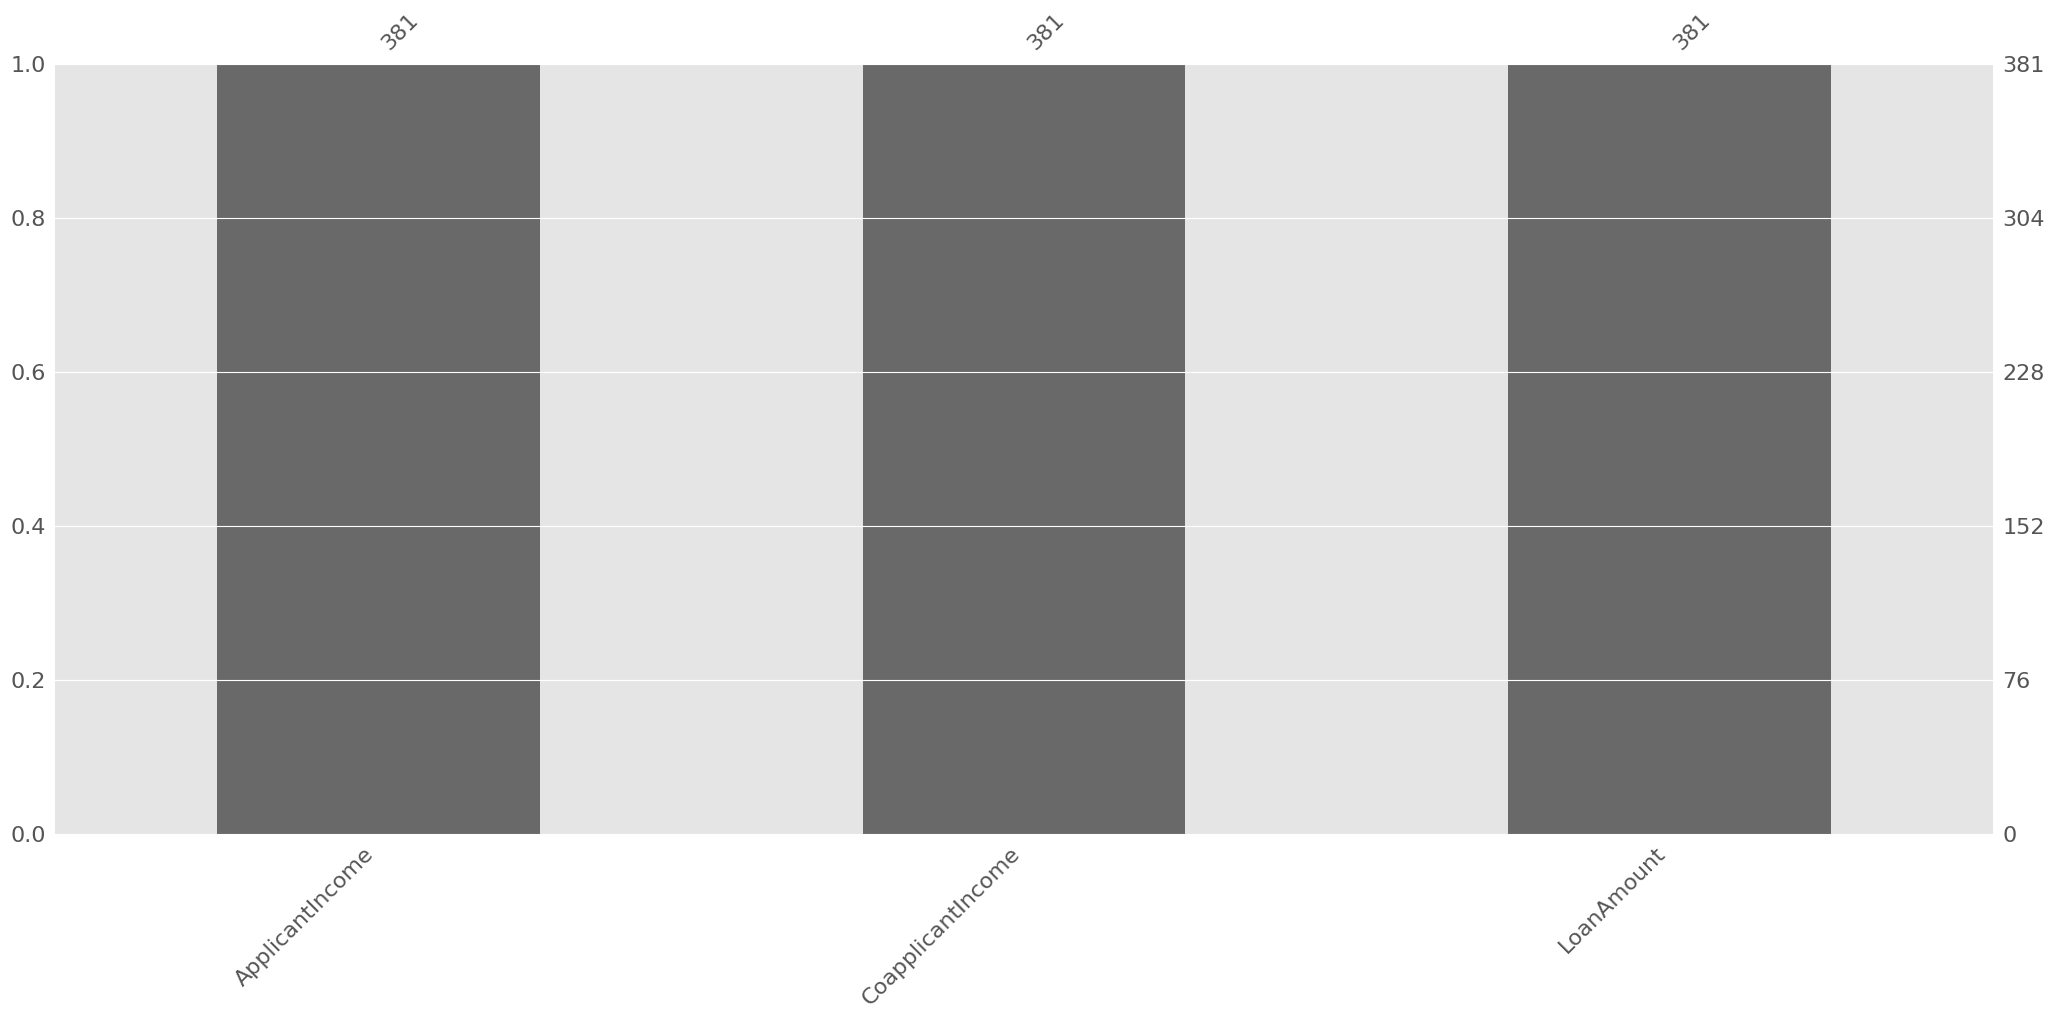

In [49]:
check_missing_value(tmp_df)

In [58]:
# 缺失值填充方法二：使用dataframe的fillna方法填充缺失值
for col in tmp_df:
    tmp_df[col].fillna(value=tmp_df[col].mean(),inplace=True)

对于当前数据集，总计：381行，3列
开始绘制缺失值分布直方图...


,data types,isMissing,missing counts,missing rate,min,max,25%,50%,75%,mean,std
ApplicantIncome,float64,False,0,0.0,210.0,9703.0,3159.000000,3546.392857,3546.392857,3546.392857,1041.954266
CoapplicantIncome,float64,False,0,0.0,0.0,33837.0,0.000000,1345.583348,1508.000000,1345.583348,2192.157748
LoanAmount,float64,False,0,0.0,17.0,150.0,105.751092,105.751092,115.000000,105.751092,22.251482


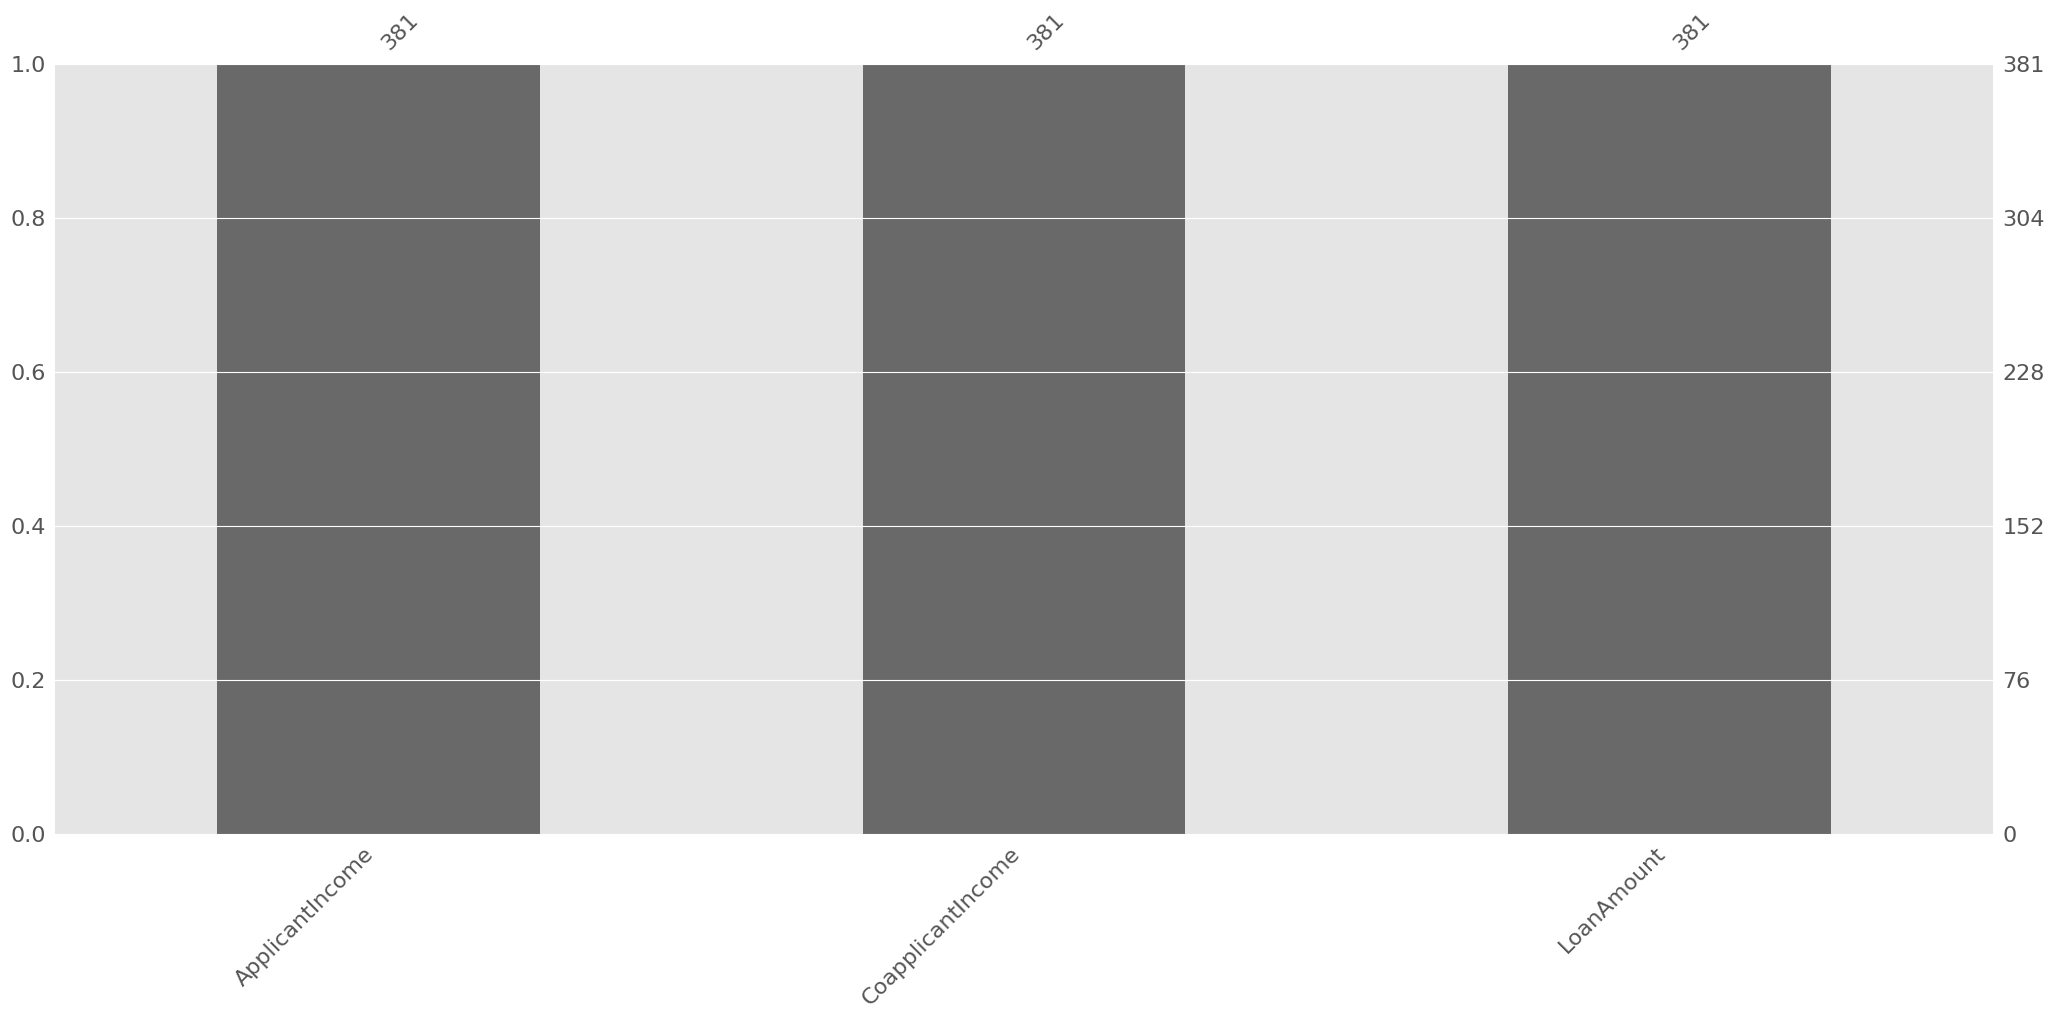

In [60]:
check_missing_value(tmp_df)

In [63]:
# 缺失值填充方法三：使用dataframe的replace方法替换缺失值
for col in tmp_df:
    tmp_df[col].replace(to_replace=np.nan,value=tmp_df[col].mean(),inplace=True)

对于当前数据集，总计：381行，3列
开始绘制缺失值分布直方图...


,data types,isMissing,missing counts,missing rate,min,max,25%,50%,75%,mean,std
ApplicantIncome,float64,False,0,0.0,210.0,9703.0,3159.000000,3546.392857,3546.392857,3546.392857,1041.954266
CoapplicantIncome,float64,False,0,0.0,0.0,33837.0,0.000000,1345.583348,1508.000000,1345.583348,2192.157748
LoanAmount,float64,False,0,0.0,17.0,150.0,105.751092,105.751092,115.000000,105.751092,22.251482


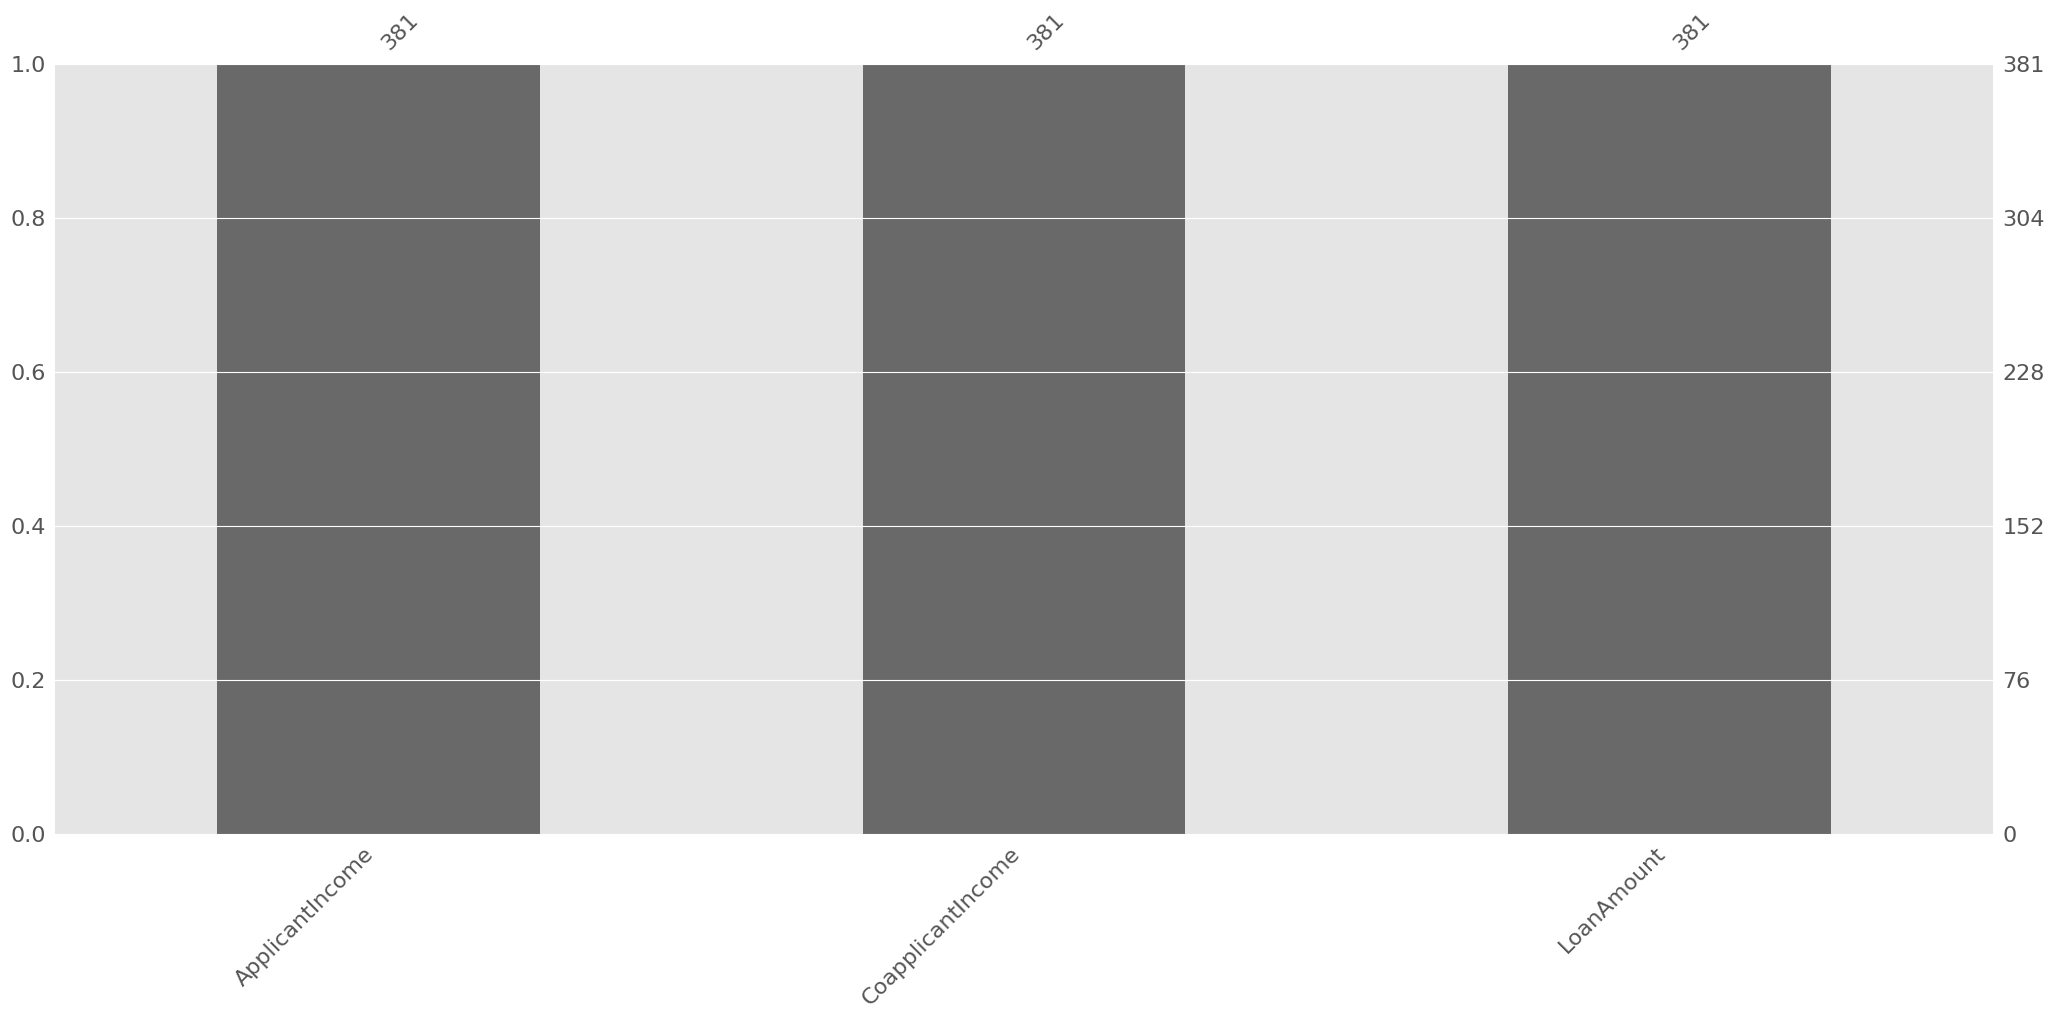

In [64]:
check_missing_value(tmp_df)

In [96]:
# 异常值检测方法1：四分位数检测法检测异常值并处理异常值

# 数据准备：构造临时测试数据
tmp_df = df[num_features]
tmp_df_columns = tmp_df.columns

In [80]:
tmp_df

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,4583,1508.0,128.0
1,3000,0.0,66.0
2,2583,2358.0,120.0
3,6000,0.0,141.0
4,2333,1516.0,95.0
...,...,...,...
376,5703,0.0,128.0
377,3232,1950.0,108.0
378,2900,0.0,71.0
379,4106,0.0,40.0


In [75]:
# 实现可复用检测函数：各特征列箱线图绘制 - 先尝试对输入数据集各个数值型特征绘制其箱线图，观察是否存在缺失值
# 如何观察？就是查看箱线图结果，落在上下触须之外的样本点就是异常值
def check_except_value(df,col_count):
    '''
    绘制数据集各个数值型特征列箱线图
    注意：复用此函数时，请确保输入的数据集中不存在标签列
    '''
    
    # 获取数据集特征列索引名称，转换为list存储
    df_columns = list(df.columns)
    print('当前数据集中所有的列为：{}'.format(df_columns))
    
    # 获取数据集的特征列的数量
    num_cols = len(df_columns)
    print('当前数据集中，列的数量为：{}'.format(num_cols))
    
    # 指定多图布局中一行布局下的列数
    num_per_rows = col_count # 无论多少个特征，多少行，反正一行就是5列
    
    # 根据数据集特征的列数以及指定的多图布局中一行的列数，计算多图布局需要多少行
    num_rows = (num_cols + num_per_rows - 1) // num_per_rows
    print('当前构造的多图布局的形状为：{}'.format((num_rows,num_per_rows)))
    
    # 创建多图均匀布局
    fig,axes = plt.subplots(num_rows,num_per_rows,figsize=(15,6 * num_rows)) # 指定多图布局的行列数
    
    # 借助enumerate枚举函数，遍历多图布局的同时获取每一个子区域绘图对象的索引，用该索引在df_columns中取值
    # 完成依次的特征的取值分布直方图的绘制
    for i,col in enumerate(df_columns):
        
        print('***当前获取到了第{}个列，其名称为：{}'.format(i + 1,col))
        
        # 计算当前需要绘制的子区域在多图均匀布局中的索引
        row_id = i // num_per_rows
        
        # 计算当前需要绘制的子区域在多图均匀布局中的列索引
        col_id = i % num_per_rows
        print('***当前列：{}要绘制的多图布局子区域的位置为：{}'.format(col,(row_id,col_id)))
        
        # 指定绘图子区域
        ax = axes[row_id, col_id] if num_rows > 1 else axes[col_id]
        
        # histplot方法绘制直方图
        sns.boxplot(df[col], ax=ax)
        
        # 设置标题
        ax.set_title(col)

当前数据集中所有的列为：['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
当前数据集中，列的数量为：3
当前构造的多图布局的形状为：(1, 3)
***当前获取到了第1个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(0, 2)


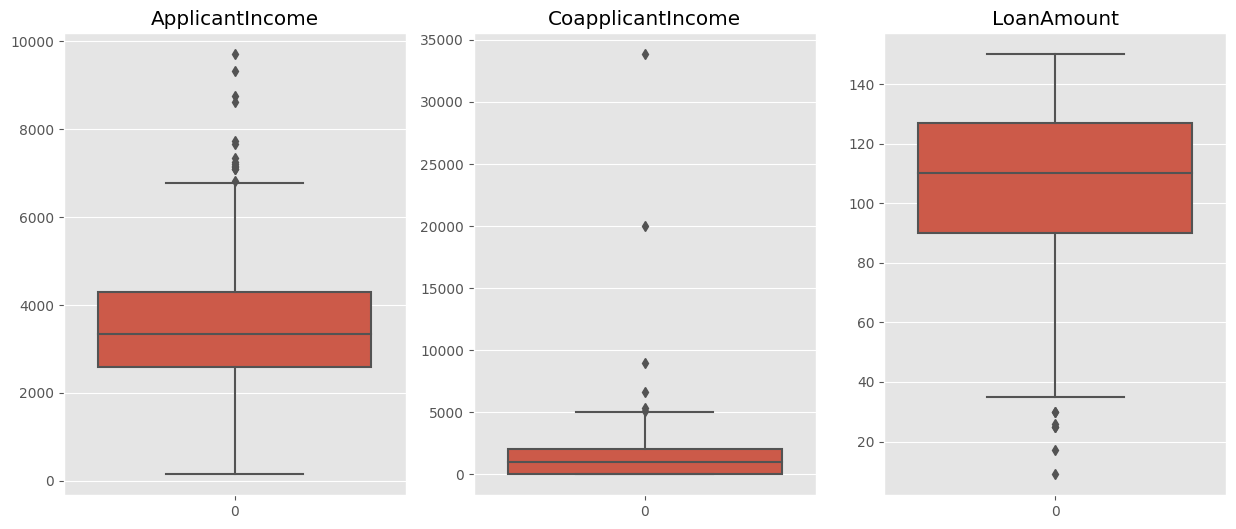

In [81]:
check_except_value(tmp_df,3)

In [100]:
# 经过各个数值型特征列的箱线图绘制，我们发现各个数值特征列当前都存在异常值
# 则开始使用四分位数检测法检测出异常值并直接将其替换
def check_and_replace_except_value(df,method):
    '''
    使用四分位数检测法检测异常值并直接对异常值做替换处理
    method:选择自己所需的异常值检测方法，默认值为IQR，表示使用四分位数检测法，如果选用3simga检测法
    则参数取值为3_sigma
    '''
    
    # 计算各个特征的数字特征- describe方法查看各特征的所有数字特征
    for col in df.columns:
        
        # 获取特征的数字特征数df
        desc = df[col].describe()
        
        # 从中获取第一、第三四分位数
        Q1 = desc['25%']
        Q3 = desc['75%']
        
        # 计算四分位间距
        IQR = Q3 - Q1
        
        # 针对特征的每一个取值，逐个检测其是否为异常值
        for value in df[col]:
            
            is_except_value = False
            
            # 选择异常值检测方法
            if method == 'IQR':
            
                # 如果value大于Q3 + 1.5IQR 或 小于Q1-1.5IQR，则认定value为异常值，直接替换即可
                if value > Q3 + 1.5 * IQR or value < Q1 - 1.5 * IQR:
                    
                    is_except_value = True
                    
            else:
                
                # 如果value大于Q3 + 1.5IQR 或 小于Q1-1.5IQR，则认定value为异常值，直接替换即可
                if np.abs(value - df[col].mean()) > 3 * desc['std']:
                    
                    is_except_value = True

            if is_except_value:
                # debug
                print('特征列：{}，检测到了一个异常值：{}'.format(col,value))

                # replace
                df[col] = df[col].replace(value,desc['50%'])
                
        print()
    return df

In [89]:
tmp_df = check_and_replace_except_value(tmp_df)

特征列：ApplicantIncome，检测到了一个异常值：7660
特征列：ApplicantIncome，检测到了一个异常值：7100
特征列：ApplicantIncome，检测到了一个异常值：7333
特征列：ApplicantIncome，检测到了一个异常值：9323
特征列：ApplicantIncome，检测到了一个异常值：9703
特征列：ApplicantIncome，检测到了一个异常值：7200
特征列：ApplicantIncome，检测到了一个异常值：6822
特征列：ApplicantIncome，检测到了一个异常值：8750
特征列：ApplicantIncome，检测到了一个异常值：7167
特征列：ApplicantIncome，检测到了一个异常值：7250
特征列：ApplicantIncome，检测到了一个异常值：8624
特征列：ApplicantIncome，检测到了一个异常值：7142
特征列：ApplicantIncome，检测到了一个异常值：7085
特征列：ApplicantIncome，检测到了一个异常值：7740

特征列：CoapplicantIncome，检测到了一个异常值：8980.0
特征列：CoapplicantIncome，检测到了一个异常值：5063.0
特征列：CoapplicantIncome，检测到了一个异常值：20000.0
特征列：CoapplicantIncome，检测到了一个异常值：5302.0
特征列：CoapplicantIncome，检测到了一个异常值：6666.0
特征列：CoapplicantIncome，检测到了一个异常值：33837.0

特征列：LoanAmount，检测到了一个异常值：17.0
特征列：LoanAmount，检测到了一个异常值：25.0
特征列：LoanAmount，检测到了一个异常值：30.0
特征列：LoanAmount，检测到了一个异常值：26.0
特征列：LoanAmount，检测到了一个异常值：9.0



/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

当前数据集中所有的列为：['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
当前数据集中，列的数量为：3
当前构造的多图布局的形状为：(1, 3)
***当前获取到了第1个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(0, 2)


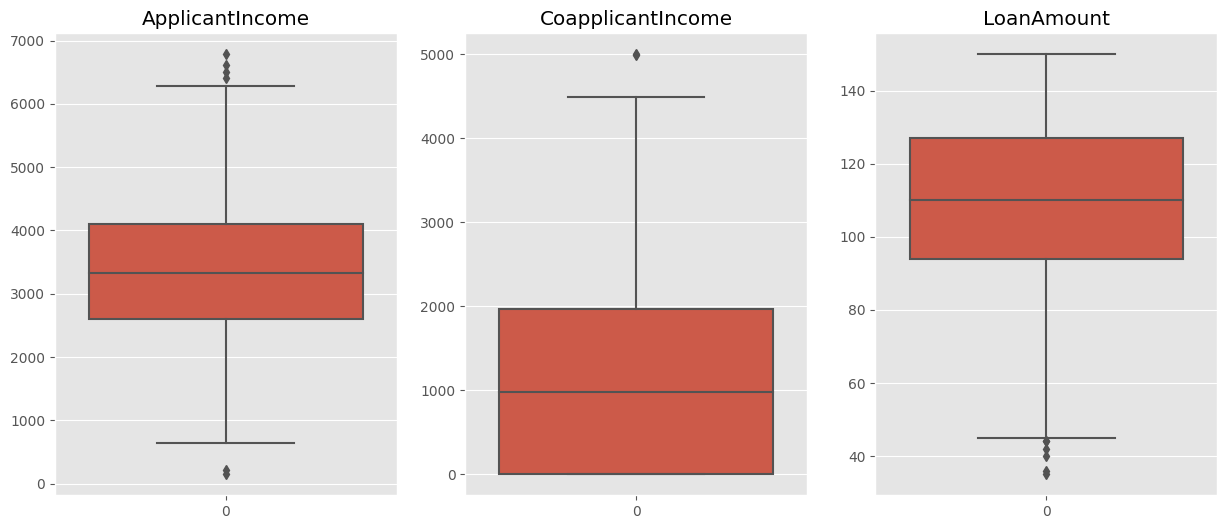

In [90]:
check_except_value(tmp_df,3)

特征列：ApplicantIncome，检测到了一个异常值：150
特征列：ApplicantIncome，检测到了一个异常值：6608
特征列：ApplicantIncome，检测到了一个异常值：6500
特征列：ApplicantIncome，检测到了一个异常值：210
特征列：ApplicantIncome，检测到了一个异常值：6783
特征列：ApplicantIncome，检测到了一个异常值：6406

特征列：CoapplicantIncome，检测到了一个异常值：5000.0
特征列：CoapplicantIncome，检测到了一个异常值：4996.0

特征列：LoanAmount，检测到了一个异常值：35.0
特征列：LoanAmount，检测到了一个异常值：44.0
特征列：LoanAmount，检测到了一个异常值：42.0
特征列：LoanAmount，检测到了一个异常值：36.0
特征列：LoanAmount，检测到了一个异常值：40.0

当前数据集中所有的列为：['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
当前数据集中，列的数量为：3
当前构造的多图布局的形状为：(1, 3)
***当前获取到了第1个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(0, 2)


/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

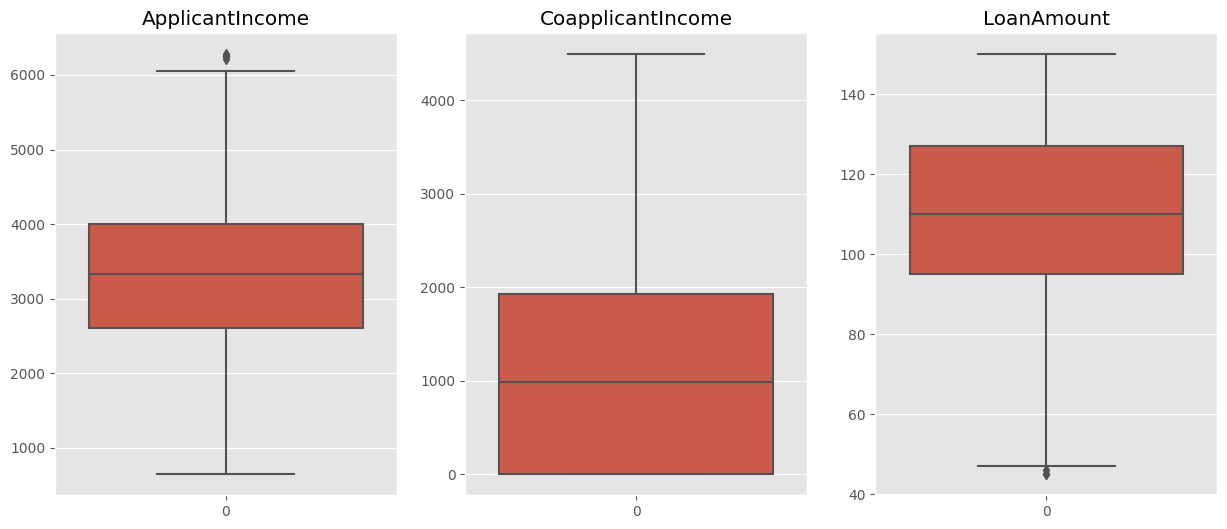

In [91]:
tmp_df = check_and_replace_except_value(tmp_df)
check_except_value(tmp_df,3)

特征列：ApplicantIncome，检测到了一个异常值：6277
特征列：ApplicantIncome，检测到了一个异常值：6250
特征列：ApplicantIncome，检测到了一个异常值：6216


特征列：LoanAmount，检测到了一个异常值：46.0
特征列：LoanAmount，检测到了一个异常值：45.0

当前数据集中所有的列为：['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
当前数据集中，列的数量为：3
当前构造的多图布局的形状为：(1, 3)
***当前获取到了第1个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(0, 2)


/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

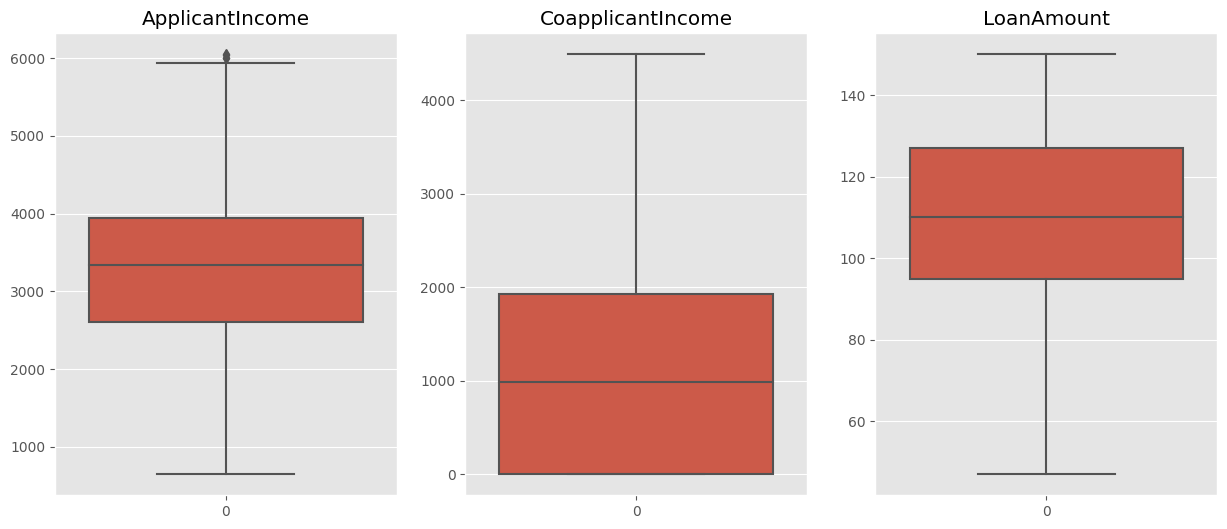

In [92]:
tmp_df = check_and_replace_except_value(tmp_df)
check_except_value(tmp_df,3)

特征列：ApplicantIncome，检测到了一个异常值：6000
特征列：ApplicantIncome，检测到了一个异常值：6050
特征列：ApplicantIncome，检测到了一个异常值：6045



当前数据集中所有的列为：['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
当前数据集中，列的数量为：3
当前构造的多图布局的形状为：(1, 3)
***当前获取到了第1个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(0, 2)


/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

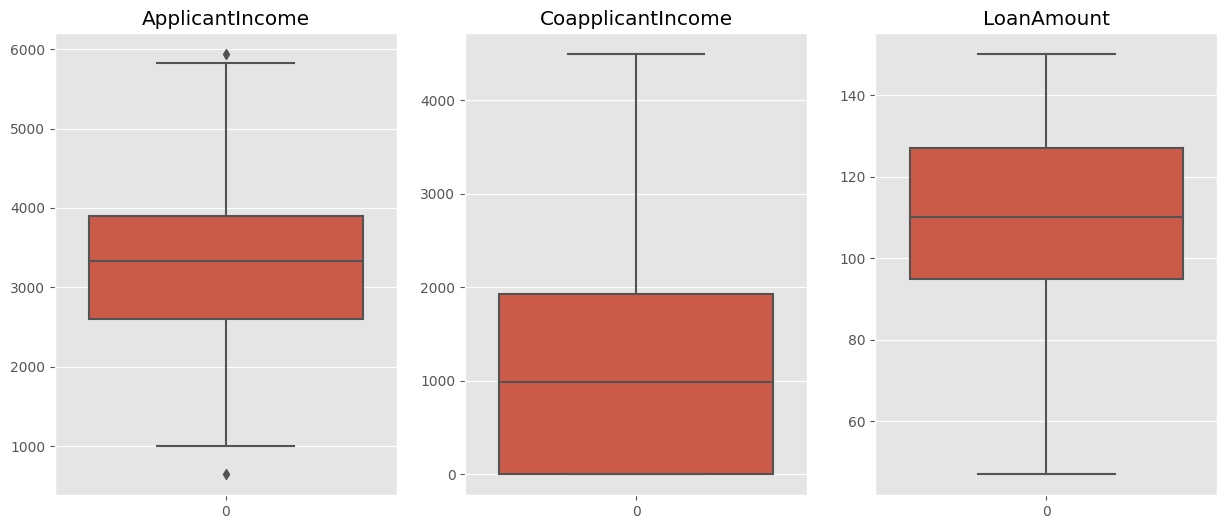

In [93]:
tmp_df = check_and_replace_except_value(tmp_df)
check_except_value(tmp_df,3)

特征列：ApplicantIncome，检测到了一个异常值：5935
特征列：ApplicantIncome，检测到了一个异常值：645



当前数据集中所有的列为：['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
当前数据集中，列的数量为：3
当前构造的多图布局的形状为：(1, 3)
***当前获取到了第1个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(0, 2)


/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


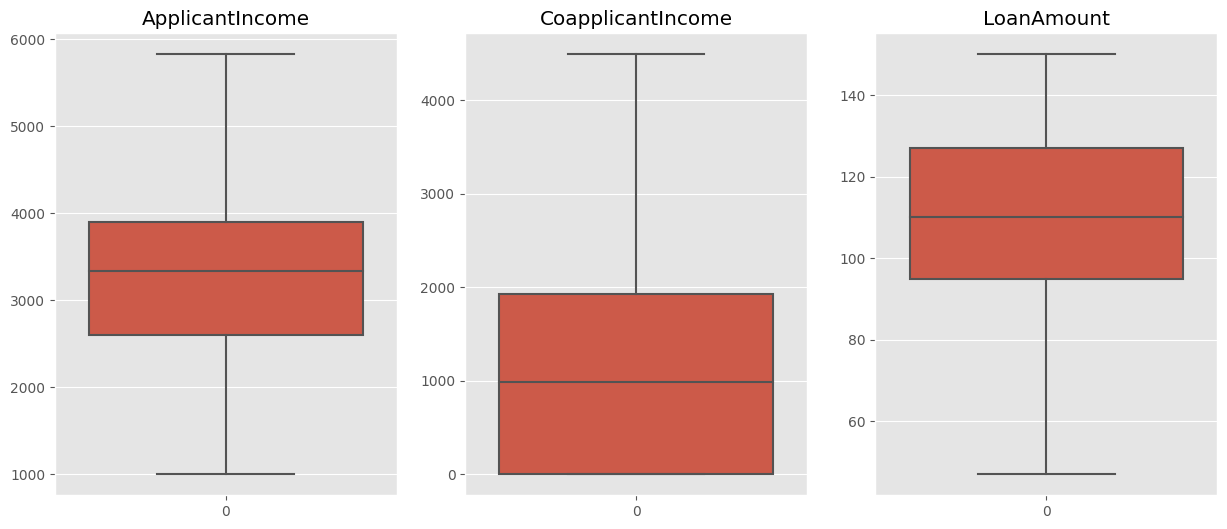

In [94]:
tmp_df = check_and_replace_except_value(tmp_df)
check_except_value(tmp_df,3)




当前数据集中所有的列为：['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
当前数据集中，列的数量为：3
当前构造的多图布局的形状为：(1, 3)
***当前获取到了第1个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(0, 2)


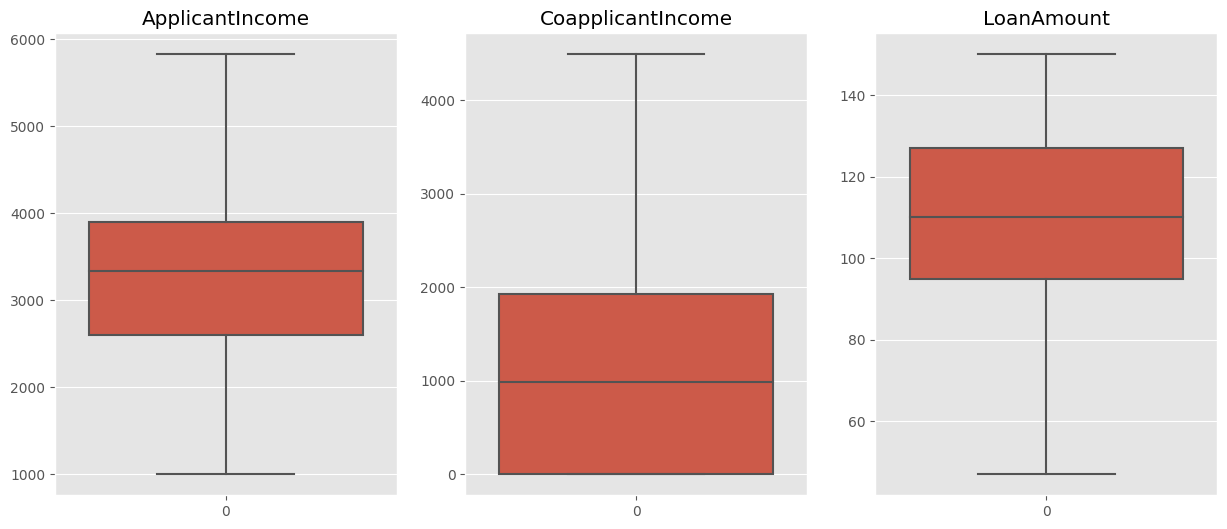

In [95]:
tmp_df = check_and_replace_except_value(tmp_df)
check_except_value(tmp_df,3)

In [97]:
# 异常值处理，并不是必须的数据预处理环节，因为你无法判断你的异常值检测并处理，能否为模型带来泛化能力的提升。
# 一般而言，一次异常值检测并处理后，会导致样本的原始特征取值分布发生细微变化，你无法判断这个过程中被
# 处理掉的异常值是否为特征所携带的某些关键信息量 - 有可能被你处理掉的异常值反而可能是样本原本较重要的信息量

# 总结：异常值检测并处理，到底要不要做，要怎么做，一切，视具体情况来定。

当前数据集中所有的列为：['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
当前数据集中，列的数量为：3
当前构造的多图布局的形状为：(1, 3)
***当前获取到了第1个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(0, 2)


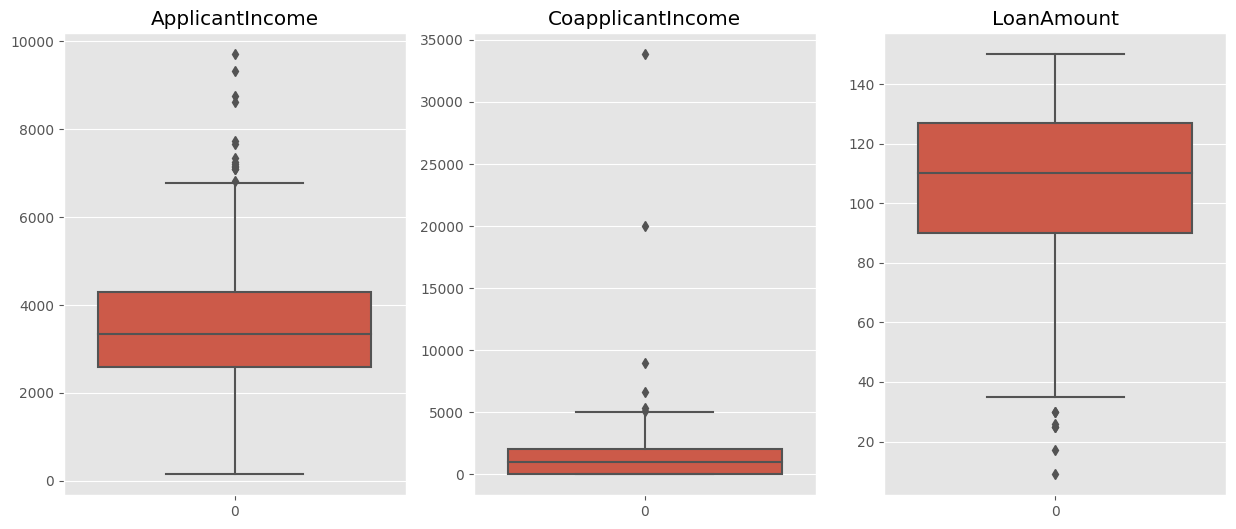

In [98]:
check_except_value(tmp_df,3)

In [101]:
tmp_df = check_and_replace_except_value(tmp_df,method='3_sigma')

特征列：ApplicantIncome，检测到了一个异常值：9323
特征列：ApplicantIncome，检测到了一个异常值：9703
特征列：ApplicantIncome，检测到了一个异常值：8750
特征列：ApplicantIncome，检测到了一个异常值：8624

特征列：CoapplicantIncome，检测到了一个异常值：8980.0
特征列：CoapplicantIncome，检测到了一个异常值：20000.0
特征列：CoapplicantIncome，检测到了一个异常值：33837.0

特征列：LoanAmount，检测到了一个异常值：17.0
特征列：LoanAmount，检测到了一个异常值：9.0



/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

当前数据集中所有的列为：['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
当前数据集中，列的数量为：3
当前构造的多图布局的形状为：(1, 3)
***当前获取到了第1个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(0, 2)


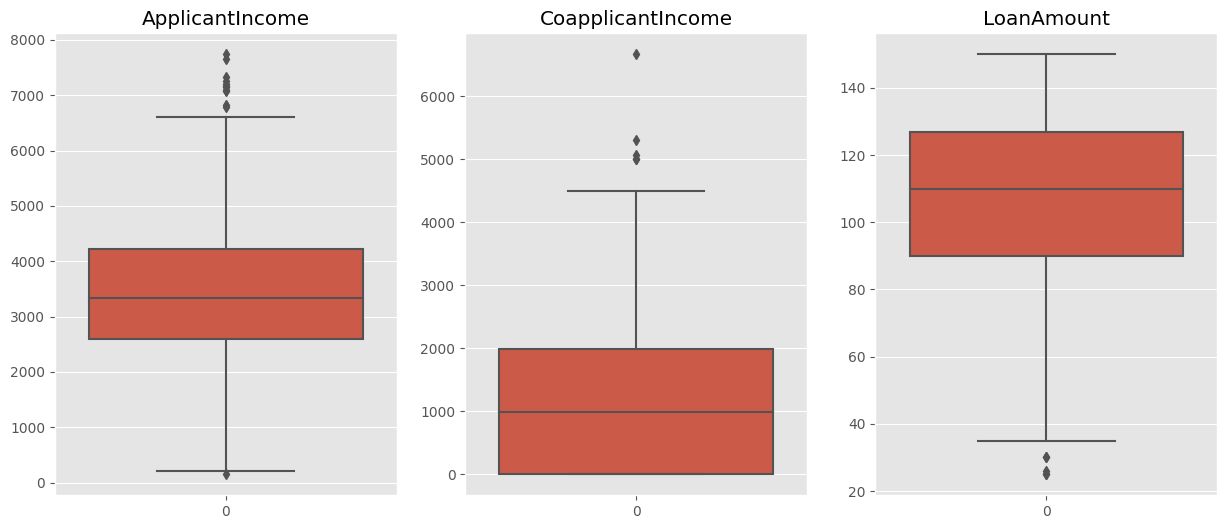

In [102]:
check_except_value(tmp_df,3)

当前数据集中所有的列为：['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
当前数据集中，列的数量为：12
当前构造的多图布局的形状为：(3, 5)
***当前获取到了第1个列，其名称为：Gender
***当前列：Gender要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：Married
***当前列：Married要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：Dependents
***当前列：Dependents要绘制的多图布局子区域的位置为：(0, 2)
***当前获取到了第4个列，其名称为：Education
***当前列：Education要绘制的多图布局子区域的位置为：(0, 3)
***当前获取到了第5个列，其名称为：Self_Employed
***当前列：Self_Employed要绘制的多图布局子区域的位置为：(0, 4)
***当前获取到了第6个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(1, 0)
***当前获取到了第7个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(1, 1)
***当前获取到了第8个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(1, 2)
***当前获取到了第9个列，其名称为：Loan_Amount_Term
***当前列：Loan_Amount_Term要绘制的多图布局子区域的位置为：(1, 3)
***当前获取到了第10个列，其名称为：Credit_History
***当前列：Credit_History要绘制的多图布局子区域的位置为：(1, 4)
***当前获取到了第11个列，其名称为：Proper

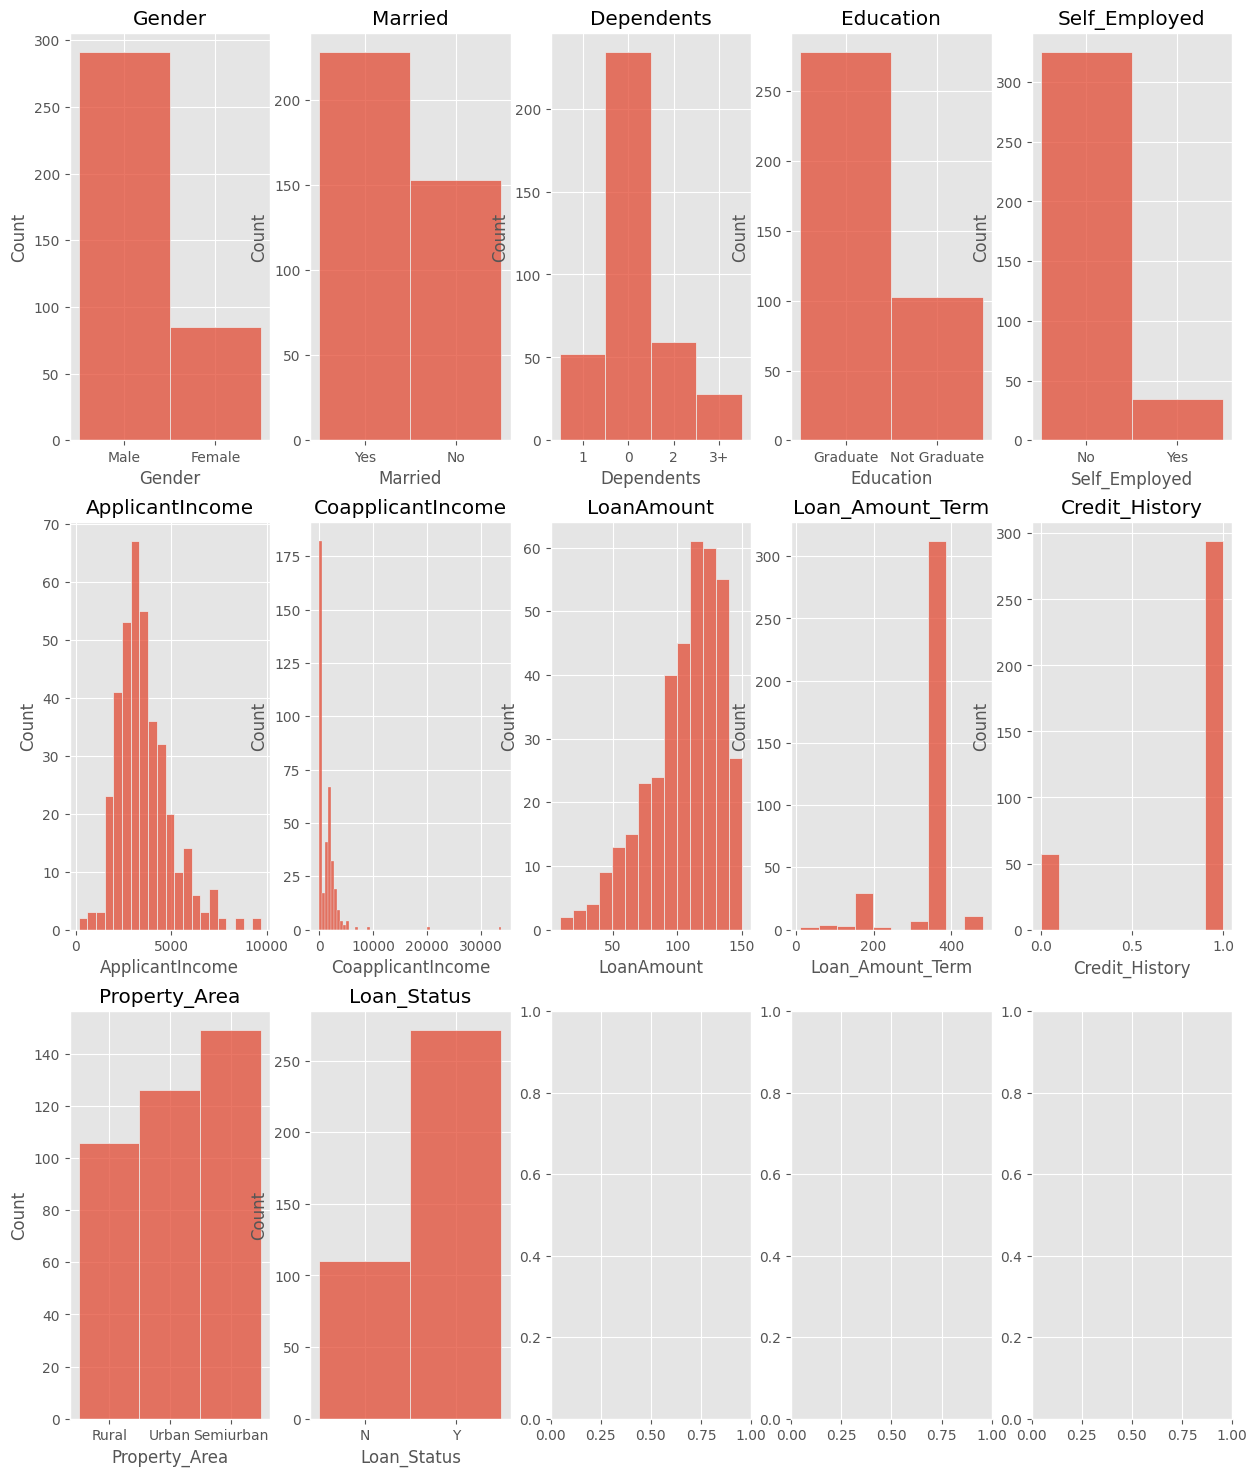

In [103]:
getHist(df,col_count=5)

In [104]:
# 临时测试
df['Loan_Status'].value_counts()

Y    271
N    110
Name: Loan_Status, dtype: int64

In [105]:
# 处理样本不均衡的问题，从根本上来说，采用的方法就是采样，只不过，这个采样，分不同的情况
'''
采样法：
    欠采样（下采样）：简言之就是减少多数类样本的数量，减少至其与少数类样本数量一致即可；
    过采样（上采样）：简言之局势增加少数类样本的数量，增加至其与多数类样本数量一致即可；
        随机过采样：简言之就是一次n重伯努利试验的进行过程，且实现的是随机重复采样，这个采样法会导致数据集中产生
        较多的重复样本，在面对诸如回归类算法的时候，容易导致出现多重共线性问题 - 两个完全相同的样本，从数学
        的矩阵或向量的概念层面来说，已经构成了线性相关关系；
        
        SMOTE过采样：简言之，SMOTE过采样，是一种随机重排后重新组合以产生新的少数类样本的方法，它会将样本的
        特征进行分组后随机重排，用多个不同的随机的特征组进行组合，生成一个全新的少数类样本
        
采样法，无论是什么方法，要么降低总样本数，要么增加总样本数

结论1：一般而言，不建议采样欠采样法，因为它会降低总样本数量 - 其实，对于绝大多数算法而言，训练样本数越大，其实
可以从根本上很方便的解决某些算法所较为头疼的显著问题，比如：对于回归类算法而言，增加训练样本数可从根本上避免
出现多重共线性问题

结论2：不建议采样随机过采样方法处理样本不均衡问题

结论3：对于采样法处理样本不均衡问题，一般而言，常用的都是SMOTE过采样方法
'''

'\n采样法：\n    欠采样（下采样）：简言之就是减少多数类样本的数量，减少至其与少数类样本数量一致即可；\n    过采样（上采样）：简言之局势增加少数类样本的数量，增加至其与多数类样本数量一致即可；\n        随机过采样：简言之就是一次n重伯努利试验的进行过程，且实现的是随机重复采样，这个采样法会导致数据集中产生\n        较多的重复样本，在面对诸如回归类算法的时候，容易导致出现多重共线性问题 - 两个完全相同的样本，从数学\n        的矩阵或向量的概念层面来说，已经构成了线性相关关系；\n        \n        SMOTE过采样：简言之，SMOTE过采样，是一种随机重排后重新组合以产生新的少数类样本的方法，它会将样本的\n        特征进行分组后随机重排，用多个不同的随机的特征组进行组合，生成一个全新的少数类样本\n        \n采样法，无论是什么方法，要么降低总样本数，要么增加总样本数\n\n结论1：一般而言，不建议采样欠采样法，因为它会降低总样本数量 - 其实，对于绝大多数算法而言，训练样本数越大，其实\n可以从根本上很方便的解决某些算法所较为头疼的显著问题，比如：对于回归类算法而言，增加训练样本数可从根本上避免\n出现多重共线性问题\n\n结论2：不建议采样随机过采样方法处理样本不均衡问题\n\n结论3：对于采样法处理样本不均衡问题，一般而言，常用的都是SMOTE过采样方法\n'

In [106]:
# 采样法处理样本不均衡问题 - 示例为使用imblearn的SMOTE方法实现SMOTE过采样
!pip install imblearn

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 257 kB 37.8 MB/s eta 0:00:01
     |████████████████████████████████| 24.8 MB 4.8 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
You should consider upgrading via the '/home/ma-user/anaconda3/envs/PyTorch-1.8/bin/python3.7 -m pip install --upgrade pip' command.


In [109]:
# 临时测试：安装imblearn的过程中，因为依赖问题，卸载了0.22旧版本的sklearn，换装了1.0较新版本的sklearn
!pip uninstall sklearn # 不要在这执行，自己打开终端执行卸载

Found existing installation: sklearn 0.0
Uninstalling sklearn-0.0:
  Would remove:
    /home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/sklearn-0.0.dist-info/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user


In [3]:
from imblearn.over_sampling import SMOTE

In [9]:
SMOTE().fit_resample(df.iloc[:,:-1],df.iloc[:,-1])
# 报错信息解释一下：因为SMOTE过采样需要随机组合产生新的样本，对于特征取值为object类型的特征是无法进行操作的
# 所以，我们就等到特征编码讲完后，回到这里，对样本执行SMOTE过采样吧！
# 同时，再说明一下modelarts公共镜像的问题：可能大部分同学采样的镜像中python版本为3.7，则无法适配1.0.1以上的
# sklearn版本，则最终导致imblearn无法依赖1.2以上的sklearn版本，最终该公共镜像无法使用
# 所以，为了彻底实现SMOTE过采样，大家需更换Python版本高于3.9的公共镜像
# 教大家下载modelarts的高版本公共镜像
# 公共镜像 -- 前往AIGallary下载第三方公共镜像 -- 选择需要的镜像 -- 镜像管理 -- 导入镜像即可
                     

ValueError: could not convert string to float: 'Male'